# Decision Tree Lab

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.io import arff
from math import floor
import math
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd
import pprint
import sklearn
#import arff


## 1. (40%) Correctly implement the ID3 decision tree algorithm, including the ability to handle unknown attributes (You do not need to handle real valued attributes).  
### Code Requirements/Notes:
- Use standard information gain as your basic attribute evaluation metric.  (Note that normal ID3 would usually augment information gain with gain ratio or some other mechanism to penalize statistically insignificant attribute splits. Otherwise, even with approaches like pruning below, the SSE type of overfit could still hurt us.) 
- You are welcome to create other classes and/or functions in addition to the ones provided below. (e.g. If you build out a tree structure, you might create a node class).
- It is a good idea to use a simple data set (like the lenses data or the pizza homework), which you can check by hand, to test your algorithm to make sure that it is working correctly. 

In [ ]:
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/lenses.arff --output debug-data.arff
train_data = arff.loadarff('debug-data.arff')
df = pd.DataFrame(train_data[0])
df['age'] = df['age'].str.decode('utf-8')
df['spectacle_prescrip'] = df['spectacle_prescrip'].str.decode('utf-8') 
df['astigmatism'] = df['astigmatism'].str.decode('utf-8') 
df['tear_prod_rate'] = df['tear_prod_rate'].str.decode('utf-8')  
df['contact_lenses'] = df['contact_lenses' ].str.decode('utf-8')  
data = np.array(df)
features = np.array(df.columns[0:-1])
X = data[:,0:-1]
y = data[:,-1]

print(df)
#print(features)
#print(train_data)
#print(X)
#print(y)

In [9]:
class DTClassifier(BaseEstimator,ClassifierMixin):
    # def __init__(self, features, x_attribute_count=None, y_attribute_count=None):
    def __init__(self, counts = None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset = 
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]
        """
        self.counts = counts
        self.gain_array = []
        #self.list_of_attributes = [list(labels).count(x) for x in ]
        #self.labels = labels # Unique identifiers of each label
        #EX [2, 3, 2]
        #self.features = {}
        #for i, feature in enumerate(features):
        #    self.features[i] = feature

        #self.used_features 
        #self.x_count = x_attribute_count # useful for calculating entropy of a feature whether it be yes or no
        #self.y_count = y_attribute_count

    def fit(self, X, y, featureNames):
        """ Fit the data; Make the Decision tree
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        #self.orig_X = X
        #self.orig_y = y
        self.featureNames = featureNames
        return self.make_tree(X, y, featureNames)

        return self
    
    def make_tree(self, data, classes, featureNames):
        # Initialize
        #pdb.set_trace()
        nData = len(data)
        nFeatures = len(data[0])
        
        
        # Make a list of the possible classes
        newClasses = []
        for aclass in classes:
            if newClasses.count(aclass) == 0:
                newClasses.append(aclass)

        #pdb.set_trace()
        # Compute the default class (and total entropy)
        totalEntropy = 0
        index = 0
        frequency = np.zeros(len(newClasses))
        for i, aclass in enumerate(newClasses):
            frequency[i] = classes.count(aclass)
            totalEntropy += self.calc_entropy(frequency[i]/nData)
            #pdb.set_trace()


        # finding the most common feature
        #pdb.set_trace()
        values, counts = np.unique(classes, return_counts=True)
        default = values[np.argmax(counts)]

        if nData == 0 or nFeatures == 0:
            #print("Made it here 11111")          
            # Have reach an empty branch
            return default
        elif len(np.unique(classes)) == 1:
            #print("Made it here 22222")         
            #return classes
            #classes.count(classes[0]) == nData:
            # Only 1 class remains
            return classes[0]
        else:

            # Choose which feature is best
            gain = np.zeros(nFeatures) # Number of unique cols's EX. Meat, Crust, Veg 
            for feature in range(nFeatures):
                g = self.calc_info_gain(data, classes, feature)
                gain[feature] = totalEntropy - g
                
            #pdb.set_trace()
            bestFeature = np.argmax(gain)
            self.gain_array.append(gain[np.argmax(gain)])
            #print("gain = ", gain[np.argmax(gain)])
            #pdb.set_trace()
            tree = {featureNames[bestFeature]:{}}
            #pdb.set_trace()
            # List the values that bestFeature can take when it branches
            values = []
            for datapoint in data:
                if datapoint[bestFeature] not in values:
                      values.append(datapoint[bestFeature])
            #pdb.set_trace()
            # Find the possible feature values
            for value in values:
                newData = []
                newClasses = []
                newNames = []
                index = 0
                #pdb.set_trace()

                # Find the datapoints with each feature value
                for datapoint in data:
                    if datapoint[bestFeature] == value:

                        # Feature is first element
                        if  bestFeature == 0:
                            newdatapoint = datapoint[1:]
                            newNames = featureNames[1:]

                        # Feature is the last element
                        elif bestFeature == nFeatures:
                            newdatapoint = datapoint[:-1]
                            newNames = featureNames[:-1]

                        # Feature is in between
                        else: #splice my new data
                            newdatapoint = datapoint[:bestFeature]
                            newdatapoint.extend(datapoint[bestFeature + 1:])
                            newNames = featureNames[:bestFeature]
                            newNames.extend(featureNames[bestFeature + 1:])

                        newData.append(newdatapoint)
                        newClasses.append(classes[index])
                    index += 1
                subtree = self.make_tree(newData, newClasses, newNames)
                #pdb.set_trace()

                # And on returning, add the subtree on to the tree
                tree[featureNames[bestFeature]][value] = subtree
                #print("Tree: ", tree)
                #pdb.set_trace()
            return tree
   
    def calc_entropy(self, p):
      if p != 0:
          return -p * np.log2(p)
      else:
          return 0 

            ## data is the column we branch on to calc the gain, feature is index of data
    def calc_info_gain(self, data, classes, feature):
        gain = 0
        nData = len(data)
        # List the values that feature acan take
        values = [] 
        #pdb.set_trace()
        for datapoint in data:
            if datapoint[feature] not in values:
                values.append(datapoint[feature]) # Make a list of posssible attributes EX. Thin crust, deep crust, no crust
        #pdb.set_trace()
        featureCounts = np.zeros(len(values)) # Array with an index for every unique feature
        entropy = np.zeros(len(values)) # Array with an index for the entropy of each unique feature
        valueIndex = 0

        # Find where those values appear in data[feature] and the correspoinding class
        # EX values = ['yes', 'no'] value = 'yes'
        for value in values:
            newClasses = []
            for i, datapoint in enumerate(data): ##
                if datapoint[feature] == value:
                    featureCounts[valueIndex] += 1
                    newClasses.append(classes[i])
            #print("For : ", value, "\nfeatureCounts: ", featureCounts)
            # Get the values in newClasses
            #pdb.set_trace()
            classValues = []
            for aclass in newClasses:
                if classValues.count(aclass) == 0:
                    classValues.append(aclass)
            #print("For classValues: ", classValues)
            #pdb.set_trace()
            classCounts = np.zeros(len(classValues))
            classIndex = 0
            for classValue in classValues:
                for aclass in newClasses:
                    if aclass == classValue:
                        classCounts[classIndex] += 1
                classIndex += 1
            #pdb.set_trace()
            #print("For classCounts: ", classCounts)
            for classIndex in range(len(classValues)):
                #print("Prob: ", classCounts[classIndex], " / ", np.sum(classCounts))
                entropy[valueIndex] += self.calc_entropy(classCounts[classIndex] / np.sum(classCounts))
            
            #print("Prob: ", featureCounts[valueIndex], " / ", nData)
            #print("Info for ", value, ": ", (featureCounts[valueIndex] / nData) * entropy[valueIndex])
            gain += (featureCounts[valueIndex] / nData) * entropy[valueIndex]
            valueIndex += 1
            
        return gain

    def classify(self,tree,datapoint):
        dic = {}
        listy = []
        #if type(tree) != type(dic) and type(tree) != type(listy):
        #pdb.set_trace()
        if type(tree) != type(dic):
            # Have reached a leaf
            #pdb.set_trace()
            return tree
        
        else:
            key_list = list(tree)
            # pdb.set_trace()
            a = key_list[0]
          
            # Find the index in my datapoint array for the attribute that the tree wants
            for i in range(len(self.featureNames)):
                if self.featureNames[i] == str(a):
                    break

            try:
                t = tree[a][datapoint[i]]
                return self.classify(t,datapoint)
            except:
                #pdb.set_trace()
                print("Should not be here")
                return None

    def predict(self, X, tree):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        results = []
        #pdb.set_trace()
        for i in range(len(X)):
            results.append(self.classify(tree,X[i]))
            #pdb.set_trace()
        return results


    def score(self, results, answers):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets 
        """
        #pdb.set_trace()
        num_Correct = 0
        for i in range(len(results)):
            if results[i] == answers[i]:
                num_Correct += 1
        return num_Correct / len(results) 

    def print_tree(self, tree, i):
      f = {}
      self.tree_string = ""
      for Key, Item in tree.items():
          for key, item in Item.items():
            self.tree_string += "\t" * i + "feature_{} = {}:\n".format(Key, key)
            if type(item) != type(f):
                self.tree_string += "\t" * (i + 1) + "prediction: {}\n".format(item)
            else:
                self.print_tree(item, i + 1)

    def display_tree(self, tree, indent = 0):
        for key, value in tree.items():
            print('\t' * indent + str(key) + ':')
            if isinstance(value, dict):
               self.display_tree(value, indent + 1)
            else:
               print('\t' * (indent + 1) + 'Pred = ' + str(value))          






In [ ]:
## DT HW data
X = [['Y', 'Thin', 'N'], 
              ['N', 'Deep', 'N'],
              ['N', 'Stuffed', 'Y'],
              ['Y', 'Stuffed', 'Y'],
              ['Y', 'Deep', 'N'],
              ['Y', 'Deep', 'Y'],
              ['N', 'Thin', 'Y'],
              ['Y', 'Deep', 'N'],
              ['N', 'Thin', 'N']]
y = ['Great', 'Bad', 'Good', 'Great', 'Good', 'Great', 'Good', 'Good', 'Bad']
features = ['Meat', 'Crust', 'Veg']
dtc = DTClassifier() 
tree = dtc.fit(X, y, features)
dtc.display_tree(tree, 0)



Meat:
	Y:
		Crust:
			Thin:
				Pred = Great
			Stuffed:
				Pred = Great
			Deep:
				Veg:
					N:
						Pred = Good
					Y:
						Pred = Great
	N:
		Veg:
			N:
				Pred = Bad
			Y:
				Pred = Good


## 1.1 Debug

Debug your model by training on the lenses dataset: [Debug Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/lenses.arff)

Test your model on the lenses test set: [Debug Test Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/lenses_test.arff)

Parameters:
(optional) counts = [3,2,2,2] (You should compute this when you read in the data, before fitting)

---

Expected Results: Accuracy = [0.33]

Predictions should match this file: [Lenses Predictions](https://raw.githubusercontent.com/cs472ta/CS472/master/debug_solutions/pred_lenses.csv)

Split Information Gains (These do not need to be in this exact order):

[0.5487949406953987, 0.7704260414863775, 0.3166890883150208, 1.0, 0.4591479170272447, 0.9182958340544894]

<!-- You should be able to get about 68% (61%-82%) predictive accuracy on the lenses data -->

Here's what your decision tree splits should look like, and the corresponding child node predictions:

Decision Tree:
<pre>
feature_3 = 0:
	feature_2 = 0:
		feature_0 = 0:
			prediction: 2
		feature_0 = 1:
			feature_1 = 0:
				prediction: 2
			feature_1 = 1:
				prediction: 1
		feature_0 = 2:
			prediction: 2
	feature_2 = 1:
		feature_1 = 0:
			feature_0 = 0:
				prediction: 1
			feature_0 = 1:
				prediction: 1
			feature_0 = 2:
				prediction: 0
		feature_1 = 1:
			prediction: 0
feature_3 = 1:
	prediction: 1
</pre>

In [ ]:
# Load debug training data 
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/lenses.arff --output debug-data.arff
train_data = arff.loadarff('debug-data.arff')
df = pd.DataFrame(train_data[0])
df['age'] = df['age'].str.decode('utf-8')
df['spectacle_prescrip'] = df['spectacle_prescrip'].str.decode('utf-8') 
df['astigmatism'] = df['astigmatism'].str.decode('utf-8') 
df['tear_prod_rate'] = df['tear_prod_rate'].str.decode('utf-8')  
df['contact_lenses'] = df['contact_lenses' ].str.decode('utf-8')  
data = np.array(df)
features = np.array(df.columns[0:-1])
features = features.tolist()
X = data[:,0:-1]
y = data[:,-1]
X = X.tolist()
y = y.tolist()

# Train Decision Tree
dtc = DTClassifier() 
debug_tree = dtc.fit(X, y, features)
#dtc.print_tree(debug_tree, 0)
#print(dtc.tree_string)
dtc.display_tree(debug_tree, 0)
print(dtc.gain_array)

# Load debug test data
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/lenses_test.arff --output lenses-data.arff
lenses_data = arff.loadarff('lenses-data.arff')
df = pd.DataFrame(lenses_data[0])
df['age'] = df['age'].str.decode('utf-8')
df['spectacle_prescrip'] = df['spectacle_prescrip'].str.decode('utf-8') 
df['astigmatism'] = df['astigmatism'].str.decode('utf-8') 
df['tear_prod_rate'] = df['tear_prod_rate'].str.decode('utf-8')  
df['contact_lenses'] = df['contact_lenses' ].str.decode('utf-8')  
data = np.array(df)
features = np.array(df.columns[0:-1])
features = features.tolist()
X = data[:,0:-1]
y = data[:,-1]
test_X = X.tolist()
test_y = y.tolist()




results = dtc.predict(test_X, debug_tree)
print("Accuracy: ", dtc.score(results, test_y))

# Print the information gain of every split you make.


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2890  100  2890    0     0  41884      0 --:--:-- --:--:-- --:--:-- 41285
tear_prod_rate:
	reduced:
		Pred = none
	normal:
		astigmatism:
			no:
				age:
					young:
						Pred = soft
					pre_presbyopic:
						Pred = soft
					presbyopic:
						spectacle_prescrip:
							myope:
								Pred = none
							hypermetrope:
								Pred = soft
			yes:
				spectacle_prescrip:
					myope:
						Pred = hard
					hypermetrope:
						age:
							young:
								Pred = hard
							pre_presbyopic:
								Pred = none
							presbyopic:
								Pred = none
[0.5487949406953982, 0.7704260414863778, 0.3166890883150208, 1.0, 1.0, 0.4591479170272448, 0.9182958340544896]
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2839  100  283

In [ ]:
# Predict and compute model accuracy
#Convert y's to strings with boolean masking
# for i in range(len(test_y)):
#     if y[i] == '0':
#         y[i] = 'none'
#     elif y[i] == '1':
#         y[i] = 'soft'
#     else:
#       y[i] = 'hard'

## 1.2 Evaluation

We will evaluate your model based on its performance on the zoo dataset. 

Train your model using this dataset: [Evaluation Train Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/zoo.arff)

Test your model on this dataset: [Evaluation Test Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/zoo_test.arff)

Parameters:
(optional) counts = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2] (You should compute this when you read in the data, before fitting)

---
Print out your accuracy on the evaluation test dataset.

Print out the information gain of every split you make.

In [ ]:
# Load zoo training data 
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/zoo.arff --output debug-data.arff
train_data = arff.loadarff('debug-data.arff')
df = pd.DataFrame(train_data[0])

# Remove the 'b' 
for key in df.columns:
    df[key] = df[key].str.decode('utf-8')

data = np.array(df)
features = np.array(df.columns[0:-1])
features = features.tolist()
X = data[:,0:-1]
y = data[:,-1]
X = X.tolist()
y = y.tolist()

# Train Decision Tree

zoo_dtc = DTClassifier() 
zoo_tree = zoo_dtc.fit(X, y, features)

zoo_dtc.display_tree(zoo_tree, 0)
print(zoo_dtc.gain_array)
# Load zoo test data
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/zoo_test.arff --output lenses-data.arff
test_data = arff.loadarff('lenses-data.arff')
df = pd.DataFrame(test_data)

# Remove the 'b' 
for key in df.columns:
    df[key] = df[key].str.decode('utf-8')
zoo_test_data = np.array(df)
features = np.array(df.columns[0:-1])
features = features.tolist()
test_X = zoo_test_data[:, 0:-1]
test_y = zoo_test_data[:, -1]
test_X = test_X.tolist()
test_y = test_y.tolist()



results = zoo_dtc.predict(test_X, zoo_tree)
print("Accuracy: ", zoo_dtc.score(results, test_y))
print("Average accuracy is very small...")

# Print the information gain of every split you make.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6683  100  6683    0     0  99746      0 --:--:-- --:--:-- --:--:-- 99746
legs:
	4:
		hair:
			T:
				Pred = cT
			F:
				predator:
					T:
						toothed:
							F:
								Pred = c7
					F:
						Pred = c3
	0:
		fins:
			T:
				eggs:
					T:
						Pred = c4
			F:
				toothed:
					F:
						Pred = c7
	2:
		hair:
			F:
				Pred = c2
			T:
				Pred = cT
	6:
		predator:
			T:
				Pred = c7
			F:
				Pred = c6
	8:
		Pred = c7
	5:
		Pred = c7
[1.3630469031539394, 0.6892019851173656, 0.8631205685666308, 0.7219280948873623, 0.7219280948873623, 0.7219280948873623, 0.7219280948873623, 0.7219280948873623, 0.6892019851173656, 0.8631205685666308, 0.7219280948873623, 0.7219280948873623, 0.7219280948873623, 0.7219280948873623, 0.7219280948873623, 0.8865408928220899, 0.6962122601251459, 0.6962122601251459, 0.6962122601251459, 0.696212260125

## 2. (20%) You will use your ID3 algorithm to induce decision trees for the cars dataset and the voting dataset.  Do not use a stopping criteria, but induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).  
- Implement and use 10-fold Cross Validation (CV) on each data set to predict how well the models will do on novel data.  
- For each dataset, report the training and test classification accuracy for each fold and the average test accuracy. 
- As a rough sanity check, typical decision tree accuracies for these data sets are: Cars: .90-.95, Vote: .92-.95.

## 2.1 Implement 10-fold Cross Validation

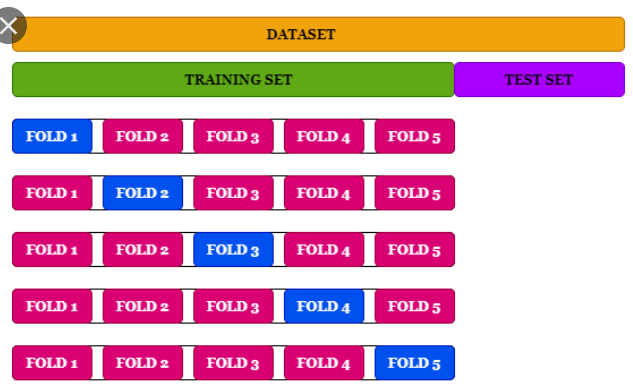

In [10]:
# Write a function that implements 10-fold cross validation
def kfold_cv(training_set, k = 1):
    #fold k times
    X_train = training_set[0]
    y_train = training_set[1]
    # of rows
    #pdb.set_trace()
    rows = len(X_train) #total number of rows
    rows_per_fold = floor(rows / k) # divide by number of partitions
    k_folds_accuracy = []
    # Store the arrays of k folds
    k_partitions_X = []
    k_partitions_y = []

    # to adjust for indexes starting at 0
    #k = k - 1
    # for each fold
    for fold in range(k + 1): # get fold to start at one
        if fold == k - 1: # Last iteration get up to the end of the data
            #print(fold * rows_per_fold, " to end")
            k_partitions_X.append(X_train[fold * rows_per_fold:])            #get up to the end of the data
            k_partitions_y.append(y_train[fold * rows_per_fold:])
            break;

        if fold == 0:
            #print("0 to ", rows_per_fold)
            k_partitions_X.append(X_train[:rows_per_fold])
            k_partitions_y.append(y_train[:rows_per_fold])

        if fold != 0:
            #print(fold * rows_per_fold, " to ", fold*rows_per_fold + rows_per_fold)
            k_partitions_X.append(X_train[fold * rows_per_fold : fold*rows_per_fold + rows_per_fold])  # 0 -> fold rows, all cols
            k_partitions_y.append(y_train[fold * rows_per_fold : fold*rows_per_fold + rows_per_fold])

    return k_partitions_X, k_partitions_y
        

    

In [11]:
def cross_validation(X, y, features, k = 10):
    k_partitions_X = []
    k_partitions_y = []
    X_train, X_final_test, y_train, y_final_test = sklearn.model_selection.train_test_split(X, y, test_size=0.10, random_state=1)
    k_partitions_X, k_partitions_y = kfold_cv([X_train, y_train], k) # divide the data for the test set into k folds and return 2 arrays of the corresponding xfold yfold values for training.
    avg_acc = 0
    # divide once more into val set, and test set
    for val_fold_index in range(k):
        results = []
        acc = 0
        val_set_X = k_partitions_X[val_fold_index]
        val_set_Y = k_partitions_y[val_fold_index]

        #concat arrays together
        new_X = None
        new_Y = None
        #pdb.set_trace()
        for i in range(k): #go k times, skip over val_fold_index
            if (i == val_fold_index):
                pass
            elif (i == 0 and val_fold_index != 0): # Be sure to initialize new_X and Y to an array first
                new_X = k_partitions_X[0]
                new_Y = k_partitions_y[0]
            elif (i == 0 and val_fold_index == 0):
                pass
            elif (i - 1 == 0 and val_fold_index == 0):
                new_X = k_partitions_X[i]
                new_Y = k_partitions_y[i]
            else:
                new_X += k_partitions_X[i]
                new_Y += k_partitions_y[i]

        #pdb.set_trace()
        cars_dtc = DTClassifier() 
        #pdb.set_trace()
        cars_tree = cars_dtc.fit(new_X, new_Y, features)
        #pdb.set_trace()
        results = cars_dtc.predict(val_set_X, cars_tree)
        acc = cars_dtc.score(results, val_set_Y)
        print("Loop ", k, " accuracy: ", acc)
        #pdb.set_trace()

        if i == 1-k:
            cars_dtc.display_tree(cars_tree, 0)

        avg_acc += acc
    print("Total Avg. Accuracy: ", avg_acc/k)
            


##  2.2 Cars Dataset
- Use this [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff)

In [308]:
# !curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff --output cars-data.arff
# train_data = arff.loadarff('cars-data.arff')
# df = pd.DataFrame(train_data[0])
# df

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55393  100 55393    0     0   406k      0 --:--:-- --:--:-- --:--:--  406k


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [20]:
# Use 10-fold CV on Cars Dataset
# Load zoo training data 


# !curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff --output cars-data.arff
# train_data = arff.loadarff('cars-data.arff')
# df = pd.DataFrame(train_data[0])

#data = list(arff.load('cars-data.arff'))
#df = pd.DataFrame(data[0])

!pip install arff
import arff
!curl https://raw.githubusercontent.com/bjamin5/CS472-1/master/cars_shuffled.arff --output cars-dataset.arff
data = list(arff.load('cars-dataset.arff'))
df = pd.DataFrame(data)
df
cars_data = np.array(df)
#pdb.set_trace()

# Remove the 'b' 
for key in df.columns:
    df[key] = df[key].str.decode('utf-8')

#features = np.array(df.columns[0:-1])
#features = features.tolist()
features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
X = cars_data[:,0:-1]
y = cars_data[:,-1]
X = X.tolist()
y = y.tolist()

# Set k
k = 10

# Create Train and Test set
X, X_final_test, y, y_final_test = sklearn.model_selection.train_test_split(X, y, test_size=0.10, random_state=1)

# Run DT one time
cars_dtc = DTClassifier([4,4,4,3,3,3]) 
cars_tree = cars_dtc.fit(X, y, features)
results = cars_dtc.predict(X_final_test, cars_tree)
acc = cars_dtc.score(results, y_final_test)
print(cars_dtc.display_tree(cars_tree, 0))
print(acc)
# print(results)
# print(acc)
#cross_validation(X, y, features, k)




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 55393  100 55393    0     0   795k      0 --:--:-- --:--:-- --:--:--  795k
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
Should not be here
safety:
	med:
		persons:
			2:
				Pred = unacc
			more:
				buying:
					low:
						maint:
							high:
								doors:
									3:
										Pred = acc
									2:
										lug_boot:
											small:
												Pred = unacc
											med:
												Pred = acc
											big:
												Pred = acc
									4:
										Pred = acc
									5more:
										Pred = acc
							med:
								lug_boot:
									med:
										doors:
											5more:
												Pred = good
											2:
				

## 2.3 Voting Dataset
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- Note that you will need to support unknown attributes in the voting data set. 

In [13]:
# Fix Dataset with missing values
from sklearn.impute import SimpleImputer
from scipy.io import arff as A
import pandas as pd

#!pip install arff
#import arff
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff --output voters-dataset.arff
data = list(A.loadarff('voters-dataset.arff'))
df = pd.DataFrame(data[0])

# Remove the 'b' 
for key in df.columns:
    df[key] = df[key].str.decode('utf-8')
voter_data = np.array(df)

features = ['handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
X = voter_data[:,0:-1]
y = voter_data[:,-1]
X = X.tolist()
y = y.tolist()

# FIX MISSING DATA
# loop through each column and replace missing values with the 'y' or 'n' with the highest frequency
highest_freq_cols = np.zeros(len(X[0]))
for row in range(len(X)):
    for col in range(len(X[0])):
        if X[row][col] == 'y':
            highest_freq_cols[col] += 1
        if X[row][col] == 'n':
            highest_freq_cols[col] -= 1

for row in range(len(X)):
    for col in range(len(X[0])):
        if X[row][col] == '?':
            if highest_freq_cols[col] >= 0:
                X[row][col] = 'y'
            else:
                X[row][col] = 'n'            

# Create Train and Test Set
X, X_final_test, y, y_final_test = sklearn.model_selection.train_test_split(X, y, test_size=0.10, random_state=1)

# Ran Once with Train and Test Set
voter_dtc = DTClassifier() 
voter_tree = voter_dtc.fit(X, y, features)
results = voter_dtc.predict(X_final_test, voter_tree)
acc = voter_dtc.score(results, y_final_test)
voter_dtc.display_tree(voter_tree, 0)
print(acc)

# Used 10-fold CV on Voting Dataset
# Report Training and Test Classification Accuracies

# Report Average Test Accuracy



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40261  100 40261    0     0   229k      0 --:--:-- --:--:-- --:--:--  229k
physician-fee-freeze:
	y:
		synfuels-corporation-cutback:
			n:
				duty-free-exports:
					n:
						adoption-of-the-budget-resolution:
							n:
								Pred = republican
							y:
								anti-satellite-test-ban:
									y:
										Pred = republican
									n:
										immigration:
											y:
												Pred = republican
											n:
												Pred = democrat
					y:
						immigration:
							n:
								anti-satellite-test-ban:
									n:
										education-spending:
											n:
												Pred = democrat
											y:
												Pred = republican
									y:
										Pred = republican
							y:
								Pred = republican
			y:
				adoption-of-the-budget-resolution:
					n:
						el-salvador-aid:
							y:
								superfund-right-to-

## 2.4 Discuss Your Results

- Summarize your results from both datasets, and discuss what you observed. 
- A fully expanded tree will often get 100% accuracy on the training set. Why does this happen and in what cases might it not?  

Each data set had it's own difficulties. While implementing cross validation I realized that some samples of the data used for training, might not include all of the variables our model will be expected to classify. Not wanting to refactor a portion of my code I decide to improve the data by shuffling the rows until all 10 datasets of 155 rows (Using CV) contained every data type, thus eliminating that problem. The voting data also needed some help as it was missing data. More on that below. 

To summarize the result from each decision tree, when buying a car, 'safety' is the biggest factor in determining how good a car is, and we know that because it split the most amount of data, increasing our chances of predicting correctly. To summarize the result from the voting dataset, it had an accuracy of 90% and the most significant factors in determing if someone voted democrat or republican were physician-fee-freeze, synfuels-corporation-cutback, duty-free-exports and adoption-of-the-budget-resolution. 

A fully expanded tree almost always got 100% accuracy because it's using the data it was trained with to predict which obviously will result in very accurate results. The goal of our model is to generalize, but if we test our model with the data we trained it with, it will fit the data and not generalize the broader relationship we are modeling. There is a small chance that the model wouldn't get 100% accuracy because no matter how strong a relationship is there is always error and variation in the data. Two data points could have identical inputs and yet have different results. By training on more data the more common occurance would be chosen by the tree as the prediction.  

## 3. (15%) For each of the two problems above, summarize in English what the decision tree has learned (i.e. look at the induced tree and describe what rules it has discovered to try to solve each task). 
- If the tree is very large you can just discuss a few of the more shallow attribute combinations and the most important decisions made high in the tree.

## 3.1 Discuss what the decision tree induced on the cars dataset has learned

The decision tree model was wide at the bottom of the tree, but the top had several branches that produced an early prediction. This tells us that the first few decisions of those variables told us a lot about the rest of the data and increased our chance of correctly predicting if a car is good/acceptable or not based on its features. 

The most important features learned by the model are as follows: Safety, number of people the car can hold, the price, the maintainance, then lugboot and number of doors were near the bottom. Our model is good at predicting as it got an average accuracy of %89 when preddicting, however in a real world situation this information isn't really useful for predicting but rather infering what factors are most important to people. If a car company got ahold of this information they could base their adds off of this information targeting the safety, capacity, price, maintenence etc.

## 3.2 Discuss what the decision tree induced on the voting dataset has learned

Our model had an average prediction accuracy of 90% which is very good. It generalized what party someone would vote for based on their opinion of other important political issues and debates. 

This data is more useful than the car data set because we not only want to infer from our model what factors are most important to a target audience but predicting an election based on the beleifs of a state or county will determine how and what you campeign in those areas. Based on demographics or information on a population, campeign specialists model voting data to know what stances and things a candidate needs to say in order to get the most votes. Pandering for votes taken to a new level.

## 3.3 How did you handle unknown attributes in the voting problem? Why did you choose this approach? (Do not use the approach of just throwing out data with unknown attributes).

Of the several ways to handle the missing voting data I chose data imputation. Being categorical data I couldn't just take the mean of that columns values so I counted up the total number of y's and n's for that column and whichever was the most common was the value used to replace the missing column data. I chose this approach because it was simple and would predict better than just throwing out the data. There was enough data that I was hoping the model would still generalize well despite the extra noise. 

## 4.1 (10%) Use SciKit Learn's decision tree on the voting dataset and compare your results. Try different parameters and report what parameters perform the best on the test set. 

### 4.1.1 SK Learn on Voting Dataset
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)

In [14]:
def score(dtmodel, X_to_predict, answers):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets 
        """
        #pdb.set_trace()
        results = dtmodel.predict(X_to_predict)
        num_Correct = 0
        for i in range(len(results)):
            if results[i] == answers[i]:
                num_Correct += 1
        return num_Correct / len(results) 

In [28]:
from scipy.io import arff as A
import pandas as pd

#!pip install arff
#import arff
!curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff --output voters-dataset.arff
data = list(A.loadarff('voters-dataset.arff'))
df = pd.DataFrame(data[0])

# Remove the 'b' 
for key in df.columns:
    df[key] = df[key].str.decode('utf-8')
voter_data = np.array(df)

features = ['handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
X = voter_data[:,0:-1]
y = voter_data[:,-1]
X = X.tolist()
y = y.tolist()

# FIX MISSING DATA
# loop through each column and replace missing values with the 'y' or 'n' with the highest frequency
highest_freq_cols = np.zeros(len(X[0]))
for row in range(len(X)):
    for col in range(len(X[0])):
        if X[row][col] == 'y':
            highest_freq_cols[col] += 1
        if X[row][col] == 'n':
            highest_freq_cols[col] -= 1

for row in range(len(X)):
    for col in range(len(X[0])):
        if X[row][col] == '?':
            if highest_freq_cols[col] >= 0:
                X[row][col] = 'y'
            else:
                X[row][col] = 'n'            

# Create Train and Test Set
X, X_final_test, y, y_final_test = sklearn.model_selection.train_test_split(X, y, test_size=0.10, random_state=1)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40261  100 40261    0     0   595k      0 --:--:-- --:--:-- --:--:--  595k


In [29]:
from sklearn import tree
import copy

# X, X_final_test, y, y_final_test
X_bin = copy.deepcopy(X)
y_bin = copy.deepcopy(y)
X_f_bin = copy.deepcopy(X_final_test)
y_f_bin = copy.deepcopy(y_final_test)

# Convert Voting dataset to binary numbers

for row in range(len(X_bin)):
    for col in range(len(X_bin[0])):
        if (X_bin[row][col] == 'y'):
            X_bin[row][col] = 1
        else:
            X_bin[row][col] = 0
for row in range(len(X_f_bin)):
    for col in range(len(X_f_bin[0])):
        if (X_f_bin[row][col] == 'y'):
            X_f_bin[row][col] = 1
        else:
            X_f_bin[row][col] = 0

for col in range(len(y_bin)):
        if (y_bin[col] == 'republican'):
            y_bin[col] = 1
        else:
            y_bin[col] = 0 # Democrats

for col in range(len(y_f_bin)):
        if (y_f_bin[col] == 'republican'):
            y_f_bin[col] = 1
        else:
            y_f_bin[col] = 0 # Democrats

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_bin, y_bin)
accuracy = score(clf, X_f_bin, y_f_bin)
print(accuracy)

clf2 = DecisionTreeClassifier("entropy")
clf2 = clf2.fit(X_bin, y_bin)
accuracy = score(clf2, X_f_bin, y_f_bin)
print(accuracy)

clf3 = DecisionTreeClassifier("gini")
clf3 = clf3.fit(X_bin, y_bin)
accuracy = score(clf3, X_f_bin, y_f_bin)
print(accuracy)

clf4 = DecisionTreeClassifier("entropy" , min_samples_split=10)
clf4 = clf4.fit(X_bin, y_bin)
accuracy = score(clf4, X_f_bin, y_f_bin)
print(accuracy)



0.9772727272727273
0.9318181818181818
0.9318181818181818
0.9772727272727273


Out of the box I got an accuracy of of %95.4. 
After experimenting with the entropy, gini, and min_samples_split, the entropy was the variable that increased the accuracy the most to %97.

## 4.2 (10%) Choose a data set of your choice (not already used in this or previous labs) and use the SK decision tree to learn it. Experiment with different hyper-parameters to try to get the best results possible.

In [30]:
# Use SciKit Learn's Decision Tree on a new dataset
!curl https://storm.cis.fordham.edu/~gweiss/data-mining/weka-data/diabetes.arff --output diabetes-dataset.arff
data = list(arff.loadarff('diabetes-dataset.arff'))
df = pd.DataFrame(data[0])
dia_data = np.array(df)
#pdb.set_trace()
X = dia_data[:,0:-1]
y = dia_data[:,-1]
# Remove the 'b' and binary encode the data
for row in range(len(y)):
    y[row] = y[row].decode('utf-8')
    if y[row] == 'tested_positive':
        y[row] = 1
    else:
        y[row] = 0 # tested negative

X = X.tolist()
y = y.tolist()

X, X_final_test, y, y_final_test = sklearn.model_selection.train_test_split(X, y, test_size=0.10, random_state=1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
accuracy = score(clf, X_final_test, y_final_test)
print(accuracy)

clf2 = DecisionTreeClassifier("entropy")
clf2 = clf2.fit(X_bin, y_bin)
accuracy = score(clf2, X_f_bin, y_f_bin)
print(accuracy)

clf3 = DecisionTreeClassifier("gini")
clf3 = clf3.fit(X_bin, y_bin)
accuracy = score(clf3, X_f_bin, y_f_bin)
print(accuracy)

clf4 = DecisionTreeClassifier("entropy" , min_samples_split=10)
clf4 = clf4.fit(X_bin, y_bin)
accuracy = score(clf4, X_f_bin, y_f_bin)
print(accuracy)

# Experiment with different hyper-parameters

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37419  100 37419    0     0   142k      0 --:--:-- --:--:-- --:--:--  142k
0.6883116883116883
0.9772727272727273
0.9545454545454546
0.9772727272727273


*Note - This dataset is new to me. If we were supposed to use it previously then I didn't make it that far in the previous labs.

The dataset I used was a diabetes dataset. 
Without modification or experimenting the average accuracy was %71.4
After experimenting with the entropy, gini, and min_samples_split, the entropy was the variable that increased the accuracy the most to %97.

## 6. (5%) Visualize your decision tree for your chosen data set (using export_graphviz or another tool) and discuss what you find. If your tree is too deep to reasonably fit on one page, show only the first several levels (e.g. top 5).

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.export_text(clf, max_depth=5)


'|--- feature_1 <= 127.50\n|   |--- feature_7 <= 28.50\n|   |   |--- feature_5 <= 45.40\n|   |   |   |--- feature_5 <= 30.95\n|   |   |   |   |--- feature_0 <= 7.50\n|   |   |   |   |   |--- feature_6 <= 0.67\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- feature_6 >  0.67\n|   |   |   |   |   |   |--- truncated branch of depth 2\n|   |   |   |   |--- feature_0 >  7.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- feature_5 >  30.95\n|   |   |   |   |--- feature_6 <= 0.50\n|   |   |   |   |   |--- feature_2 <= 53.00\n|   |   |   |   |   |   |--- truncated branch of depth 3\n|   |   |   |   |   |--- feature_2 >  53.00\n|   |   |   |   |   |   |--- truncated branch of depth 6\n|   |   |   |   |--- feature_6 >  0.50\n|   |   |   |   |   |--- feature_5 <= 38.65\n|   |   |   |   |   |   |--- truncated branch of depth 8\n|   |   |   |   |   |--- feature_5 >  38.65\n|   |   |   |   |   |   |--- class: 0\n|   |   |--- feature_5 >  45.40\n|   |   |   |--- feature_2 <= 9

The datasets consist of several medical predictor variables and one target  variable of whether or not a patient tested positive for diabetes. Some of the Independent variables included the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. To keep the tree from going to deep I truncated it at a depth of 5.

This didn't display well in Google Colab but copied and pasted into VS code It looked like this.

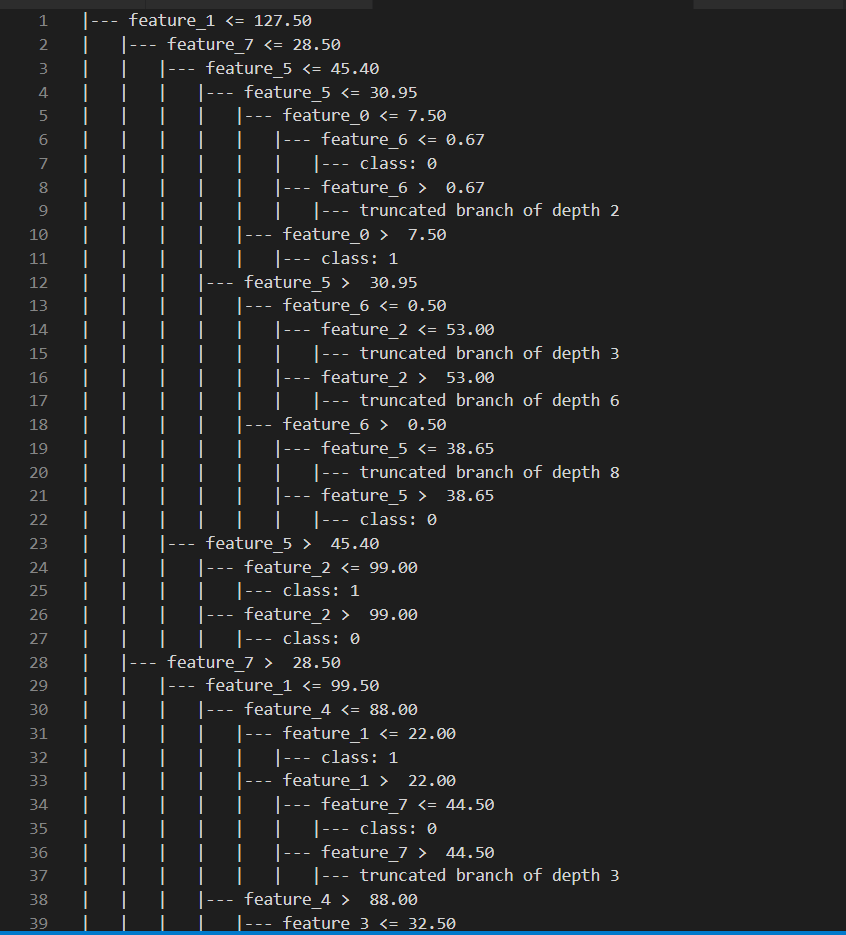

## 7. (optional 5% extra credit) Implement reduced error pruning to help avoid overfitting.  
- You will need to take a validation set out of your training data to do this, while still having a test set to test your final accuracy. 
- Create a table comparing your decision tree implementation's results on the cars and voting data sets with and without reduced error pruning. 
- This table should compare:
    - a) The # of nodes (including leaf nodes) and tree depth of the final decision trees 
    - b) The generalization (test set) accuracy. (For the unpruned 10-fold CV models, just use their average values in the table).